[Excercise 4](https://youtu.be/jGg_1h0qzaM?t=4394)

Conditional logic

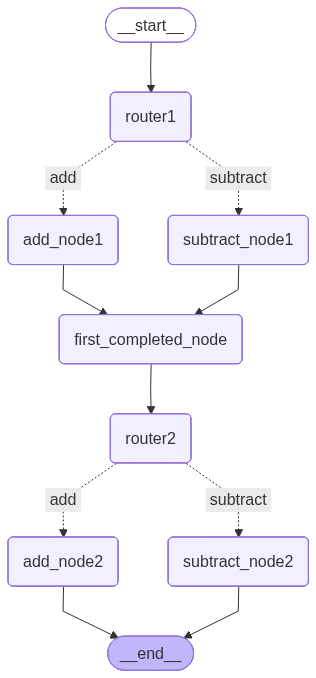

In [1]:
from typing import TypedDict

from IPython.display import Image, display
from langgraph.graph import END, START, StateGraph

class State(TypedDict):
    number1: int
    number2: int
    operation1: str
    result1: int
    number3: int
    number4: int
    operation2: str
    result2: int
    first: bool


def first(state: State) -> State:
    state["first"] = False
    return state


def add(state: State) -> State:
    if state["first"]:
        state["result1"] = state["number1"] + state["number2"]
    else:
        state["result2"] = state["number3"] + state["number4"]
    return state


def subtract(state: State) -> State:
    if state["first"]:
        state["result1"] = state["number1"] - state["number2"]
    else:
        state["result2"] = state["number3"] - state["number4"]
    return state


def router(state: State) -> str:
    if state["first"]:
        if state["operation1"] == "add":
            return "add"
        elif state["operation1"] == "subtract":
            return "subtract"
        else:
            raise ValueError("Invalid operation1")
    else:
        if state["operation2"] == "add":
            return "add"
        elif state["operation2"] == "subtract":
            return "subtract"
        else:
            raise ValueError("Invalid operation2")


graph = StateGraph(State)

graph.add_node("add_node1", add)
graph.add_node("subtract_node1", subtract)
graph.add_node("add_node2", add)
graph.add_node("subtract_node2", subtract)
graph.add_node("first_completed_node", first)
graph.add_node("router1", lambda state:state)
graph.add_node("router2", lambda state:state)
graph.add_edge(START, "router1")
graph.add_conditional_edges(
    "router1",
    router,
    {
        "add": "add_node1",
        "subtract": "subtract_node1"
    })
graph.add_edge("add_node1", "first_completed_node")
graph.add_edge("subtract_node1", "first_completed_node")
graph.add_edge("first_completed_node", "router2")
graph.add_conditional_edges(
    "router2",
    router,
    {
        "add": "add_node2",
        "subtract": "subtract_node2"
    })
graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)


workflow = graph.compile()
display(Image(workflow.get_graph().draw_mermaid_png()))

In [2]:
result = workflow.invoke({
    "number1": 5,
    "number2": 3,
    "operation1": "add",
    "number3": 2,
    "number4": 1,   
    "operation2": "add",
    "first": True})

print(result)

{'number1': 5, 'number2': 3, 'operation1': 'add', 'result1': 8, 'number3': 2, 'number4': 1, 'operation2': 'add', 'result2': 3, 'first': False}
